# Iris Flower Prediction

Iris Flower Prediction is a classic  `Multivariate Classification Problems` often used for Introduction to Machine Learning especially in Classification techniques where we need to Predict the Iris Flower Species given it's features or characteristics of each flower class.

<img src="static/iris_image.png" width="700" >

The Iris dataset was used in R.A. Fisher's classic 1936 paper, [The Use of Multiple Measurements in Taxonomic Problems](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), and can also be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris) and the [Kaggle](https://www.kaggle.com/uciml/iris) as well.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

Since it's very popular dataset, it's already included in **R** and some library in **Python** like scikit-learn and **Seaborn**.

---

## Load Library and Dataset
We will use `Seaborn` to load the Iris Dataset. and since the Label `species` is multi class and specified by **`String`** we will use Tree Classifier which can output the string as prediction result, just for convinient

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br>

## Exploratory Data Analysis
Usualy before we started to modelling, we will take a look to the data to analyze the features that might help for prediction

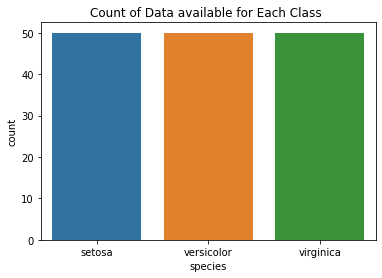

In [3]:
sns.countplot(x='species',data=df)
plt.title('Count of Data available for Each Class ')
plt.show()

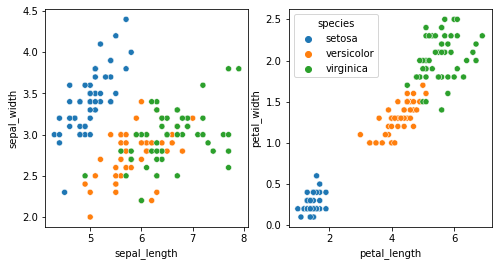

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', ax=ax1, data=df, legend=False)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', ax=ax2, data=df)
plt.show()

<br>

The number of each class label is 50, hence the data is balanced for each class.

Based on Scatterplot, **Setosa** is Linear separable, but **Versicolor** and **Virginica** is seems unseparable in the sepal features, but in petal features seems it have separation in terms of petal length and petal width

___

## Modelling and Optimization
In the modelling Phase, we will use **Grid Search Crossvalidation** to find the best parameters of the models.

In [5]:
# Create Training and Testing Data
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_test.shape

((120, 4), (30,))

In [6]:
# Grid Search parameters and training the models
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('RF', RandomForestClassifier())
])

parameters = {
    'poly__degree':[1,2],
    'poly__interaction_only':[True, False],
    'RF__max_depth':[3,5],
    'RF__max_features':[2,3,4]
}

model = GridSearchCV(pipeline, param_grid=parameters, 
                     cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
model.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.5s finished


{'RF__max_depth': 3,
 'RF__max_features': 3,
 'poly__degree': 1,
 'poly__interaction_only': False}

In [7]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Train score
print(accuracy_score(y_train, pred_train))

# Test score
print(accuracy_score(y_test, pred_test))

0.975
0.9666666666666667


In [8]:
# Get Model Parameters
model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('poly', PolynomialFeatures()),
  ('scaler', StandardScaler()),
  ('RF', RandomForestClassifier())],
 'estimator__verbose': False,
 'estimator__poly': PolynomialFeatures(),
 'estimator__scaler': StandardScaler(),
 'estimator__RF': RandomForestClassifier(),
 'estimator__poly__degree': 2,
 'estimator__poly__include_bias': True,
 'estimator__poly__interaction_only': False,
 'estimator__poly__order': 'C',
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__RF__bootstrap': True,
 'estimator__RF__ccp_alpha': 0.0,
 'estimator__RF__class_weight': None,
 'estimator__RF__criterion': 'gini',
 'estimator__RF__max_depth': None,
 'estimator__RF__max_features': 'auto',
 'estimator__RF__max_leaf_nodes': None,
 'estimator__RF__max_samples': None,
 'estimator__RF__min_impurity_decrease': 0.0,
 'estimator__RF__min_impurity_split': None,
 'estimator__RF__

<br>

## Export Model
Since We already have a good model with the best parameters, we will need to export the model to binary files such as pickle so that model can be used to serve as Prediction

In [9]:
import pickle
pickle.dump(model, open('iris_model.pkl','wb'))

In [10]:
# To show files in Linux
# !ls | grep .pkl

# To Show files in Windows
!dir | findstr ".pkl"


13/12/2020  17:37           104.958 iris_model.pkl
